## Linear regression with one variable

Consider the data set $(x^{(1)}, y^{(1)}), \dots, (x^{(m)}, y^{(m)})$, where $x$ is the independent variable and $y$ is the dependent variable. We will model this data set as follows:

\begin{equation}
f(x) = \alpha + \beta x.
\end{equation}

What are the values of $\alpha$ and $\beta$ that provide the best fit to the data set? To answer this question, we minimize the sum of squared errors:

\begin{align*}
J(\alpha, \beta) &= \frac{1}{2m}\sum_{i=1}^N (f(x^{(i)}) - y^{(i)})^2 \\
                 &= \frac{1}{2m}\sum_{i=1}^N (\alpha + \beta x^{(i)} - y^{(i)})^2.
\end{align*}

$J(\alpha, \beta)$ is called the *cost function*, or *objective function*. Let's minimize the cost function with respect to $\alpha$ and $\beta$. We will denote the optimal values by $\hat{\beta}$ and $\hat{\alpha}$:

\begin{align*}
\frac{\partial J}{\partial\alpha} = 0 &\to \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)} - y^{(i)}) = 0 \\
\frac{\partial J}{\partial\beta}  = 0 &\to \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)} - y^{(i)})x^{(i)} = 0.
\end{align*}

Consider the following definitions:

\begin{equation}
\bar{x} = \frac{1}{m}\sum_{i=1}^m x^{(i)} ,\qquad
\bar{y} = \frac{1}{m}\sum_{i=1}^m y^{(i)} ,\qquad
S_x^2   = \frac{1}{m}\sum_{i=1}^m (x^{(i)} - \bar{x})^2 ,\qquad
C_{xy}  = \frac{1}{m}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \bar{y}).
\end{equation}

These quantities should be familiar: $\bar{x}$ is the sample mean of $x$, $\bar{y}$ is the sample mean of $y$, $S_x^2$ is the (biased) sample variance of $x$, and $C_{xy}$ is the (biased) sample covariance of $x$ and $y$. Using these definitions, it can be shown after straightforward algebra that

\begin{equation}
\hat{\beta} = \frac{C_{xy}}{S_x^2}, \qquad
\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}.
\end{equation}

## Linear regression with `statsmodels`

Below we will create a fake dataset, run linear regression on it using `statsmodels`, and try to reproduce the various outputs.

In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

Generate data:

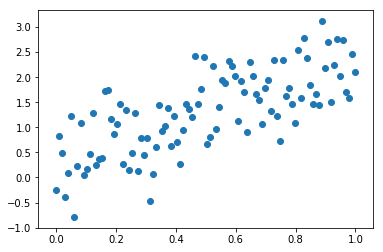

In [2]:
# Make results reproducible
np.random.seed(123)

N = 100
x = np.linspace(0, 1, 100)
y_std = 0.5
y = np.random.normal(loc=2.0*x+0.3, scale=y_std, size=N)
plt.scatter(x, y);

Run regression using `statsmodels`:

In [3]:
X = np.column_stack([np.ones(len(x)), x])
model = regression.linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           2.63e-17
Time:                        14:45:09   Log-Likelihood:                -84.642
No. Observations:                 100   AIC:                             173.3
Df Residuals:                      98   BIC:                             178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3065      0.113      2.710      0.008       0.082       0.531
x1             2.0140      0.195     10.306      0.000       1.626       2.402
==============================================================================
Omnibus:                        2.753   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.746
Skew:                           0.035   Prob(JB):                        0.418
Kurtosis:                       2.356   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is quite a lot of information here. Let's try to reproduce the output from first principles.

## $\hat{\beta}$ and $\hat{\alpha}$

In [4]:
beta = np.cov(x, y, bias=True)[0, 1] / np.var(x)
alpha = np.mean(y) - beta * np.mean(x)
print("Beta  = {}".format(beta))
print("Alpha = {}".format(alpha))

Beta  = 2.01403383001
Alpha = 0.306537621742


## R-squared

R-squared (usually denoted $R^2$) is defined as 

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^m(y^{(i)} - f^{(i)})^2}{\sum_{i=1}^m(y^{(i)} - \bar{y})^2},
\end{equation}

where $f(x)$ is any model of the data and $f^{(i)} = f(x^{(i)})$. R-squared compares the error in prediction $y^{(i)} - f^{(i)}$ to that of the trivial model $f=\bar{y}$. The smaller the error of prediction the closer $R^2$ is to $1$. In that sense, it measures the porpotion of variance in the dependent variable $y$ that is predictable from the independent variable $x$ using the model $f$. Note, however, that this is an *in-sample* measure of goodness-of-fit, if the same dataset if used to fit the parameters of the model *and* compute $R^2$.

Let's confirm $R^2$ for our linear regression model above:

In [5]:
f = alpha + beta * x
1 - np.dot(f - y, f - y) / np.dot(y - y.mean(), y - y.mean())

0.5200895667266314

When the model $f$ is linear regression with an intercept term, $R^2$ is equal to the square of the sample correlation between $f$ and $y$. Let's check this:

In [6]:
np.corrcoef(f, y)[0, 1]**2

0.5200895667266312

Indeed! Let's prove this.

Consider the following definitions:

\begin{equation}
S_y^2   = \frac{1}{m}\sum_{i=1}^m (y^{(i)} - \bar{y})^2 ,\qquad
r_{xy}  = \frac{C_{xy}}{S_xS_y},
\end{equation}

where $S_y$ is the (biased) sample variance of $y$ and $r_{xy}$ is the sample correlation coefficient of $x$ and $y$. Using this, we can express $\hat{\beta}$ as follows:

\begin{equation}
\hat{\beta} = \frac{r_{xy}S_y}{S_x}.
\end{equation}

Also note that:

\begin{equation}
f^{(i)} - \bar{y} = \hat{\alpha} + \hat{\beta}x^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x}).
\end{equation}

The second equality follows from $\hat{\alpha}=\bar{y} - \hat{\beta}\bar{x}$.

\begin{align*}
\frac{1}{m}\sum_{i=1}^m(f^{(i)} - y^{(i)})^2
&= \frac{1}{m}\sum_{i=1}^m[(f^{(i)} - \bar{y}) - (y^{(i)} - \bar{y}) ]^2 \\
&= \frac{1}{m}\sum_{i=1}^m(f^{(i)} - \bar{y})^2 + \frac{1}{m}\sum_{i=1}^m(y^{(i)} - \bar{y})^2 - \frac{2}{m}\sum_{i=1}^m(f^{(i)} - \bar{y})(y^{(i)} - \bar{y}) \\
&= \frac{\hat{\beta}^2}{m}\sum_{i=1}^m(x^{(i)} - \bar{x})^2 + S_y^2 - \frac{\hat{\beta}}{m}\sum_{i=1}^m(x^{(i)} - \bar{x})(y^{(i)} - \bar{y}) \\
&= \hat{\beta}^2 S_x^2 + S_y^2 - 2\hat{\beta}C_{xy} \\
&= S_y^2(1 - r_{xy}^2),
\end{align*}

where the third equality follows from $f^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x})$, and the last one from substituting the value of $\hat{\beta}$.

Finally:

\begin{align*}
R^2 &= 1 - \frac{\frac{1}{m}\sum_{i=1}^m(y^{(i)} - f^{(i)})^2}{\frac{1}{m}\sum_{i=1}^m(y^{(i)} - \bar{y})^2} \\
    &= 1 - \frac{S_y^2(1 - r_{xy}^2)}{S_y^2} \\
    &= r_{xy}
\end{align*}

We proved that $R^2$ is given by the square of the sample correlation between $x$ and $y$, and not $f$ and $y$ as originally promised! First, let's numerically check what we just proved:

In [7]:
np.corrcoef(x, y)[0, 1]**2

0.5200895667266315

Good! Now let's do the extra work and show that $r_{fy}^2 = r_{xy}^2$.

To do this, we'll need one more result:

\begin{equation}
\bar{f}
    = \frac{1}{m}\sum_{i=1}^m f^{(i)}
    = \frac{1}{m}\sum_{i=1}^m (\hat{\alpha} + \hat{\beta}x^{(i)})
    = \hat{\alpha} + \hat{\beta}\bar{x}
    = \bar{y},
\end{equation}
where the last line follows from $\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$.

Now we're ready:

\begin{align*}
r_{fy}
&= \frac{\sum_{i=1}^m (f^{(i)} - \bar{f})(y^{(i)} - \bar{y})}{\sqrt{\sum_{i=1}^m (f^{(i)} - \bar{f})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\sum_{i=1}^m (f^{(i)} - \bar{y})(y^{(i)} - \bar{y})}{\sqrt{\sum_{i=1}^m (f^{(i)} - \bar{y})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\hat{\beta}\sum_{i=1}^m (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})}{\sqrt{\hat{\beta}^2\sum_{i=1}^m (x^{(i)} - \bar{x})^2}\sqrt{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}} \\
&= \frac{\hat{\beta}}{|\hat{\beta}|}r_{xy},
\end{align*}

where the second equality follows from $\bar{f}=\bar{y}$ and the third equality follows from $f^{(i)} - \bar{y} = \hat{\beta}(x^{(i)}-\bar{x})$. There we have it:

\begin{equation}
R^2 = r_{fy}^2 = r_{xy}^2.
\end{equation}